In [1]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
import pylab


In [2]:
def show_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
mydog = cv2.imread("puppy.jpg")

Displaying the image

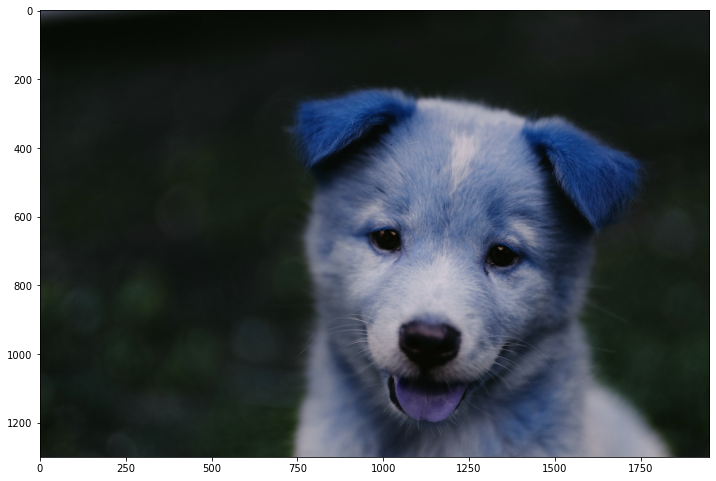

In [4]:
show_img(mydog)

In [5]:
print(mydog.shape)

(1300, 1950, 3)


In [6]:
bluedogpixels = mydog[:,:,0]

In [7]:
graydog = cv2.cvtColor(mydog, cv2.COLOR_BGR2GRAY)

In [8]:
print(graydog.shape)

(1300, 1950)


Affine transformations - Rotation, Translation, Shear, scaling

an affine transformation is a geometric transformation that preserves lines and parallelism (but not necessarily distances and angles).

In [9]:
# cv2.warpAffine(image, transformationmatrix, (width_transformedimage, height_transformedimage))

In [10]:
height, width = graydog.shape[:2]
dogcenter = height/2,width/2

In [11]:
rotate_matrix = cv2.getRotationMatrix2D(center = dogcenter, angle = 45, scale = 1)

In [12]:
rotated_dog = cv2.warpAffine(graydog.copy(),rotate_matrix, (width, height))

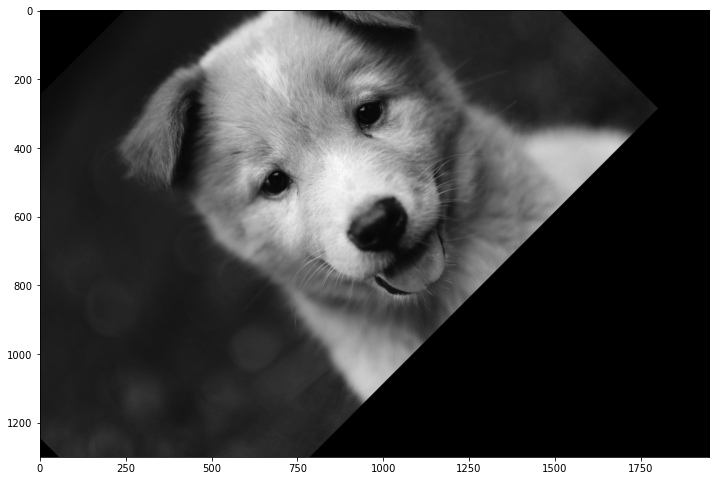

In [13]:
show_img(rotated_dog)

Translation

In [14]:
horizontalshift = width/2
verticalshift = 0
translation_matrix = np.array([
                               [1,0, horizontalshift],
                               [0,1, verticalshift]
], dtype = np.float32)

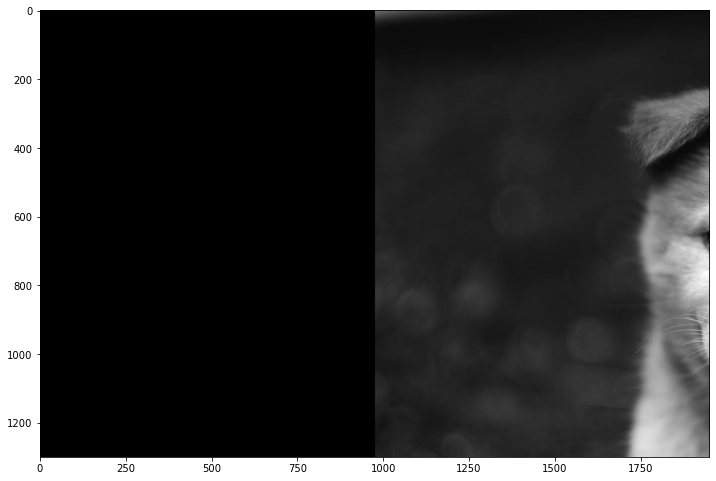

In [15]:
translation_dog = cv2.warpAffine(graydog.copy(), translation_matrix, (width, height))
show_img(translation_dog)

Scaling 

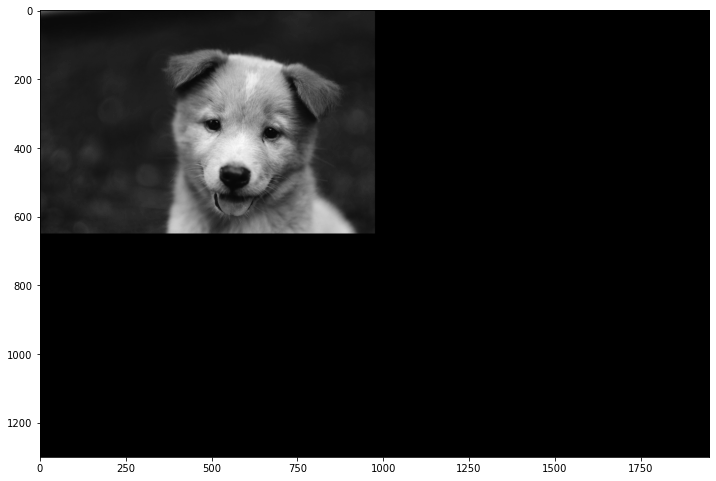

In [16]:
horizontalscalefactor = 0.5
verticalscalefactor = 0.5
scaling_matrix = np.array([
                               [horizontalscalefactor,0, 0],
                               [0,verticalscalefactor, 0]
], dtype = np.float32)
scaling_dog = cv2.warpAffine(graydog.copy(), scaling_matrix, (width, height))
show_img(scaling_dog)

Shear

Shear tool is used to shift one part of an image, a layer, a selection or a path to a direction and the other part to the opposite direction. For instance, a horizontal shearing will shift the upper part to the right and the lower part to the left. A rectangle becomes a diamond.

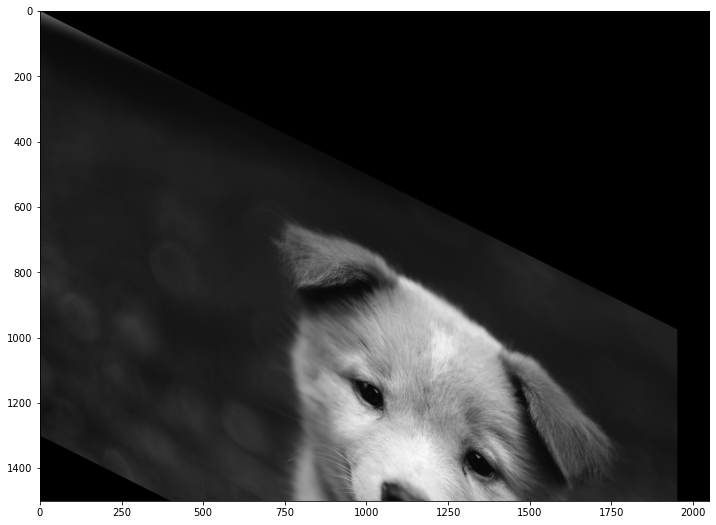

In [17]:
shearing_matrix = np.array([
                            [1,0, 0],
                            [0.5,1, 0]
], dtype = np.float32)
shearing_dog = cv2.warpAffine(graydog.copy(), shearing_matrix, (width+100, height+200))
show_img(shearing_dog)

Affine transformation

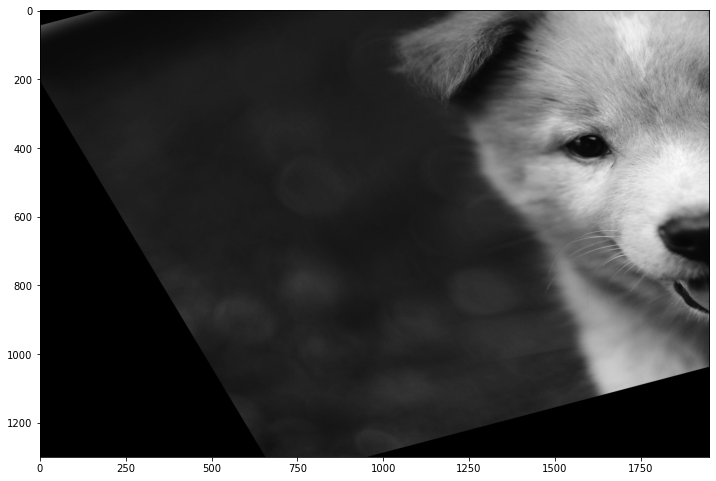

In [18]:

srcepoints = np.float32([[50, 50], 
                   [200, 50],
                   [50, 200]])
  
destpoints = np.float32([[10, 100],
                   [200, 50], 
                   [100, 250]])

Affine_DogMatrix = cv2.getAffineTransform(srcepoints, destpoints)
Affine_dog = cv2.warpAffine(graydog.copy(), Affine_DogMatrix, (width, height))
show_img(Affine_dog)

https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html